In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [3]:
len(train_data)

8982

In [4]:
len(test_data)

2246

In [5]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [7]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [8]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [9]:
train_labels[10]

3

In [13]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

In [14]:
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results

# 훈련 레이블 벡터 변환
one_hot_train_labels = to_one_hot(train_labels)
# 테스트 레이블 벡터 변환
one_hot_test_labels = to_one_hot(test_labels)

In [15]:
from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [16]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

W0728 23:59:00.223280 13244 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0728 23:59:00.272149 13244 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:529: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0728 23:59:00.287644 13244 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:4420: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [17]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

W0728 23:59:05.549765 13244 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\optimizers.py:793: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0728 23:59:05.574697 13244 deprecation_wrapper.py:119] From C:\Users\gun79\Anaconda3\envs\venv\lib\site-packages\keras-2.2.4-py3.6.egg\keras\backend\tensorflow_backend.py:3564: The name tf.log is deprecated. Please use tf.math.log instead.



In [18]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [20]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 1s 124us/step - loss: 0.1097 - acc: 0.9588 - val_loss: 1.0476 - val_acc: 0.8060
Epoch 2/20
7982/7982 [==============================] - 1s 125us/step - loss: 0.1122 - acc: 0.9598 - val_loss: 1.0599 - val_acc: 0.7990
Epoch 3/20
7982/7982 [==============================] - 1s 121us/step - loss: 0.0989 - acc: 0.9590 - val_loss: 1.0785 - val_acc: 0.8000
Epoch 4/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.1065 - acc: 0.9577 - val_loss: 1.1280 - val_acc: 0.7890
Epoch 5/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.0993 - acc: 0.9574 - val_loss: 1.0867 - val_acc: 0.8020
Epoch 6/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.1010 - acc: 0.9597 - val_loss: 1.1163 - val_acc: 0.7960
Epoch 7/20
7982/7982 [==============================] - 1s 119us/step - loss: 0.1005 - acc: 0.9574 - val_loss: 1.1228 - val_acc: 0.7990


In [21]:

import matplotlib.pyplot as plt

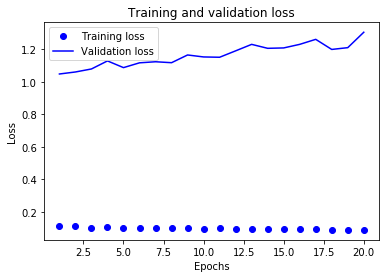

In [22]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

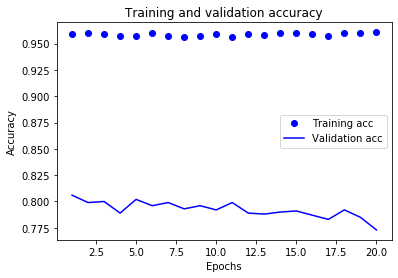

In [23]:

plt.clf()   # 그래프를 초기화합니다

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [24]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=9,
          batch_size=512,
          validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Train on 7982 samples, validate on 1000 samples
Epoch 1/9
7982/7982 [==============================] - 1s 158us/step - loss: 2.5798 - acc: 0.4862 - val_loss: 1.7500 - val_acc: 0.6250
Epoch 2/9
7982/7982 [==============================] - 1s 130us/step - loss: 1.4471 - acc: 0.6927 - val_loss: 1.3326 - val_acc: 0.7010
Epoch 3/9
7982/7982 [==============================] - 1s 130us/step - loss: 1.0859 - acc: 0.7661 - val_loss: 1.1731 - val_acc: 0.7290
Epoch 4/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.8562 - acc: 0.8191 - val_loss: 1.0488 - val_acc: 0.7660
Epoch 5/9
7982/7982 [==============================] - 1s 121us/step - loss: 0.6860 - acc: 0.8572 - val_loss: 1.0039 - val_acc: 0.7780
Epoch 6/9
7982/7982 [==============================] - 1s 126us/step - loss: 0.5471 - acc: 0.8856 - val_loss: 0.9431 - val_acc: 0.8020
Epoch 7/9
7982/7982 [==============================] - 1s 117us/step - loss: 0.4399 - acc: 0.9080 - val_loss: 0.9472 - val_acc: 0.7950
Epoch 8

In [25]:
results

[0.9947222884170519, 0.7867319679430098]

In [26]:
import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
float(np.sum(np.array(test_labels) == np.array(test_labels_copy))) / len(test_labels)

0.1714158504007124

In [27]:
predictions = model.predict(x_test)

In [28]:
predictions[0].shape

(46,)

In [29]:
np.sum(predictions[0])

1.0000001

In [30]:
np.argmax(predictions[0])

3

In [31]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

In [32]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

In [33]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 239us/step - loss: 2.8568 - acc: 0.2274 - val_loss: 2.3163 - val_acc: 0.2920
Epoch 2/20
7982/7982 [==============================] - 2s 193us/step - loss: 1.9288 - acc: 0.3884 - val_loss: 1.6814 - val_acc: 0.6550
Epoch 3/20
7982/7982 [==============================] - 2s 193us/step - loss: 1.4245 - acc: 0.6964 - val_loss: 1.4974 - val_acc: 0.6710
Epoch 4/20
7982/7982 [==============================] - 2s 192us/step - loss: 1.2541 - acc: 0.7201 - val_loss: 1.4555 - val_acc: 0.6850
Epoch 5/20
7982/7982 [==============================] - ETA: 0s - loss: 1.1641 - acc: 0.734 - 1s 185us/step - loss: 1.1625 - acc: 0.7344 - val_loss: 1.4381 - val_acc: 0.6850
Epoch 6/20
7982/7982 [==============================] - 1s 186us/step - loss: 1.0925 - acc: 0.7403 - val_loss: 1.4476 - val_acc: 0.6840
Epoch 7/20
7982/7982 [==============================] - 1s 184us/step - loss: 1.0381 - acc: 0.7438

In [ ]:
#1.
#이 데이터셋은 총 46개의 주제중에 하나를 가지는 짤막한 뉴스 데이터의 집합이다.
#(3.4_practice)에서와 같이 데이터는 딕셔너리와 그에 해당하는 인덱스로 구성되어 있다.
#2.
#이 모델은 (3.4_practice)와 비슷하게, 딕셔너리의 각각의 원소에 46차원의 벡터를
#대응시키고, 각각의 원소(단어)에 대해 46개의 토픽에 대한 가중치를 설정한다.
#이 가중치는 train_set을 통해 학습하며, 가중치를 통해, test_set이 입력되었을 때,
#입력값에 대한 결과값을 토픽에 대한 인덱스로 출력한다.
#3.
#(3.4_practice)와 비슷하게 가공 되었는데, 가장 많이 사용된 10000개의 단어로
#딕셔너리를 만들고 각각의 뉴스를 단어단위로 쪼개서 딕셔너리에 대응되는 인덱스로
#바꿔줬다.
#4.
#입력층에서는 한 뉴스를 딕셔너리에 맞춰 인덱스화하여 사용된 단어를 세어서
#10000차원의 벡터로 만들어서 입력해주고, 출력층에서는 입력값으로 들어온 뉴스가
#어떤 토픽에 해당하는지에 대한 예상이 나온다.